## Example script
Takes you through the basics of generating a lower resolution version of the paper's figures and simulations. 
#### Load dependencies

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

#### Load problem constants

In [2]:
alphafile = "../data/alpha-tula1.jld"
d = get_pomdp()
g = get_grid(d.pomdp.states)

RectangleGrid with 866133 points

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out `gen_pairwise_policy` line to use pre-computed policy datafile for the next part.

In [3]:
# gen_pairwise_policy(d)
alpha = read_alpha(alphafile)

866134x36 Array{Float64,2}:
 -16.002   -10.002   -8.002    -10.002   …  -2.001    -8.001    -1.77727e-7 
 -16.002   -10.002   -8.002    -10.002      -2.001    -8.001    -4.35477e-7 
 -16.002   -10.002   -8.002    -10.002      -2.001    -8.001    -6.86322e-7 
 -16.0022  -10.002   -8.002    -10.002      -2.001    -8.001    -1.00483e-6 
 -16.0024  -10.002   -8.002    -10.002      -2.001    -8.001    -1.44532e-6 
 -16.0027  -10.002   -8.002    -10.002   …  -2.001    -8.00111  -2.08298e-6 
 -16.0028  -10.002   -8.002    -10.002      -2.001    -8.00113  -3.04971e-6 
 -16.0029  -10.002   -8.002    -10.002      -2.001    -8.00116  -4.58602e-6 
 -16.0031  -10.0021  -8.002    -10.002      -2.001    -8.00119  -7.15046e-6 
 -16.0032  -10.0022  -8.002    -10.002      -2.001    -8.00122  -1.16778e-5 
 -16.0033  -10.0023  -8.002    -10.002   …  -2.001    -8.00126  -2.03167e-5 
 -16.0034  -10.0025  -8.002    -10.002      -2.00102  -8.00132  -3.8501e-5  
 -16.0036  -10.0027  -8.002    -10.002      -2.0

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:10.0:360.0)

Slider{Float64}([Input{Float64}] 15.0,"v0",15.0,10.0:5.0:20.0)

Slider{Float64}([Input{Float64}] 15.0,"v1",15.0,10.0:5.0:20.0)

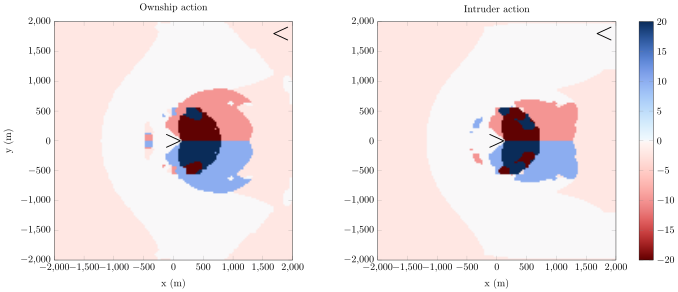

In [4]:
viz_pairwise_policy(d, alpha)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that `iutilFn = 1` correponds to the max-min policy, and that `iutilFn = 2` corresponds to the max-sum policy.

Slider{Int64}([Input{Int64}] 1,"iutilFn",1,1:2)

Slider{Int64}([Input{Int64}] 180,"p",180,0:30:360)

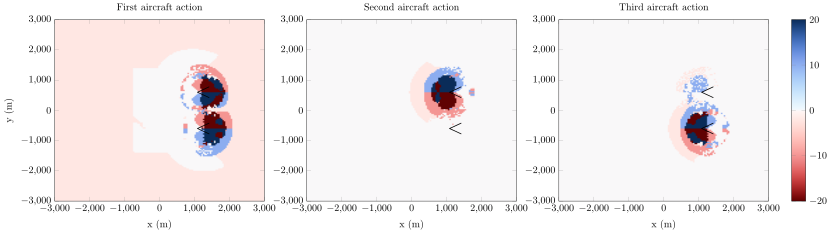

In [5]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 4.140e+00 ms

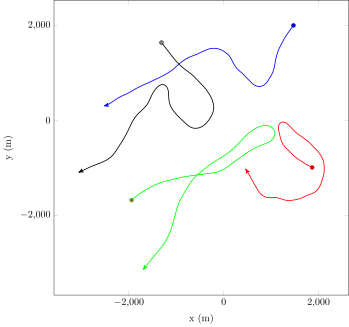

In [6]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [7]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 7.81e-01 sec
maxmin nlms: [0,0,0,0,0]
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [1657,1665,1681,1573,1569]
maxmin alert bool: [20,20,20,20,20]
average maxmin times: [0.00030740500200000006,0.00040777898399999994,0.0005900498440000001,0.00021967539200000024,0.00011397985100000002]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
maxsum alerts: [1568,1657,1616,1666,1685]
maxsum alert bool: [20,20,20,20,20]
average maxsum times: [0.00029340462799999997,8.776748100000002e-5,0.000639763513,0.000127706799,9.711623899999999e-5]
nuavs = 3: cputime = 1.24e+00 sec
maxmin nlms: [0,0,0,111,0]
maxmin nlms bool: [0,0,0,2,0]
maxmin alerts: [2342,2346,2413,2376,2371]
maxmin alert bool: [30,30,30,30,30]
average maxmin times: [0.0007075888159999999,0.0006591393419999999,0.0026755169410000003,0.00023553690399999997,0.00024000175099999998]
maxsum nlms: [73,61,21,77,66]
maxsum nlms bool: [3,2,1,2,4]
maxsum alerts: [2541,2624,2508,2449,2416]
maxsum ale